In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/task2-dataset/data2.csv


# Loading the data and Preprocessing

In [2]:
income_df=pd.read_csv("/kaggle/input/task2-dataset/data2.csv")
income_df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

In [3]:
income_df.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [4]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
income_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

****Let's first split the dataset into input columns and target columns....Here income is the target column where we need to use the claassifier model to predict whether it is above 50k or not..... basciallly a yes or no output.... ****

In [6]:
input_df = income_df.drop('income', axis=1)
target_df= income_df['income']
input_df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country  
0              4356              40  United-States  
1              4356              18  United-States  
2              4356              40  United-States  
3              3900              40  United-States  
4              3900              40  United-States  
...             ...             ...            ...  
32556             0              40  United-States  
32557             0              38  United-States  
32558             0              40  United-States  
32559             0              40  United-States  
32560             0              20  United-States  

[32561 rows x 14 columns]

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Identifing numeric and categorical columns

numeric_cols=input_df.select_dtypes(include=['int64','float64']).columns.to_list()
categorical_cols=input_df.select_dtypes(include=['object']).columns.to_list()


# Impute and scale numeric columns....well i explained the need of scaling and imputing in the previous task so beh!
imputer = SimpleImputer().fit(input_df[numeric_cols])
input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
scaler = MinMaxScaler().fit(input_df[numeric_cols])
input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])


**ONE-HOT_ENCODNING categorical data.. coz well to fit the data in our model in order the train we need to have our categorical data converted in 1s and 0s...**

In [9]:
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [10]:
# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(input_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
input_df[encoded_cols]=encoder.transform(input_df[categorical_cols])


In [11]:
processed_df=input_df[numeric_cols+encoded_cols]
processed_df

age    fnlwgt  education.num  capital.gain  capital.loss  \
0      1.000000  0.043987       0.533333           0.0      1.000000   
1      0.890411  0.081896       0.533333           0.0      1.000000   
2      0.671233  0.118021       0.600000           0.0      1.000000   
3      0.506849  0.086982       0.200000           0.0      0.895317   
4      0.328767  0.171404       0.600000           0.0      0.895317   
...         ...       ...            ...           ...           ...   
32556  0.068493  0.202298       0.600000           0.0      0.000000   
32557  0.136986  0.166404       0.733333           0.0      0.000000   
32558  0.315068  0.096500       0.533333           0.0      0.000000   
32559  0.561644  0.094827       0.533333           0.0      0.000000   
32560  0.068493  0.128499       0.533333           0.0      0.000000   

       hours.per.week  workclass_?  workclass_Federal-gov  \
0            0.397959          1.0                    0.0   
1            0.173469          0.0                    0.0   
2            0.397959          1.0                    0.0   
3            0.397959          0.0                    0.0   
4            0.397959          0.0                    0.0   
...               ...          ...                    ...   
32556        0.397959          0.0                    0.0   
32557        0.377551          0.0                    0.0   
32558        0.397959          0.0                    0.0   
32559        0.397959          0.0                    0.0   
32560        0.193878          0.0                    0.0   

       workclass_Local-gov  workclass_Never-worked  ...  \
0                      0.0                     0.0  ...   
1                      0.0                     0.0  ...   
2                      0.0                     0.0  ...   
3                      0.0                     0.0  ...   
4                      0.0                     0.0  ...   
...                    ...                     ...  ...   
32556                  0.0                     0.0  ...   
32557                  0.0                     0.0  ...   
32558                  0.0                     0.0  ...   
32559                  0.0                     0.0  ...   
32560                  0.0                     0.0  ...   

       native.country_Portugal  native.country_Puerto-Rico  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   
...                        ...                         ...   
32556                      0.0                         0.0   
32557                      0.0                         0.0   
32558                      0.0                         0.0   
32559                      0.0                         0.0   
32560                      0.0                         0.0   

       native.country_Scotland  native.country_South  native.country_Taiwan  \
0                          0.0                   0.0                    0.0   
1                          0.0                   0.0                    0.0   
2                          0.0                   0.0                    0.0   
3                          0.0                   0.0                    0.0   
4                          0.0                   0.0                    0.0   
...                        ...                   ...                    ...   
32556                      0.0                   0.0                    0.0   
32557                      0.0                   0.0                    0.0   
32558                      0.0                   0.0                    0.0   
32559                      0.0                   0.0                    0.0   
32560                      0.0                   0.0                    0.0   

       nati

**alrighty... now we'll visualize this to make it a lil lively and less boring... And yeah also understaning the relation between different features and how they depend on each other**

# EDA!!!!visualizationzz

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

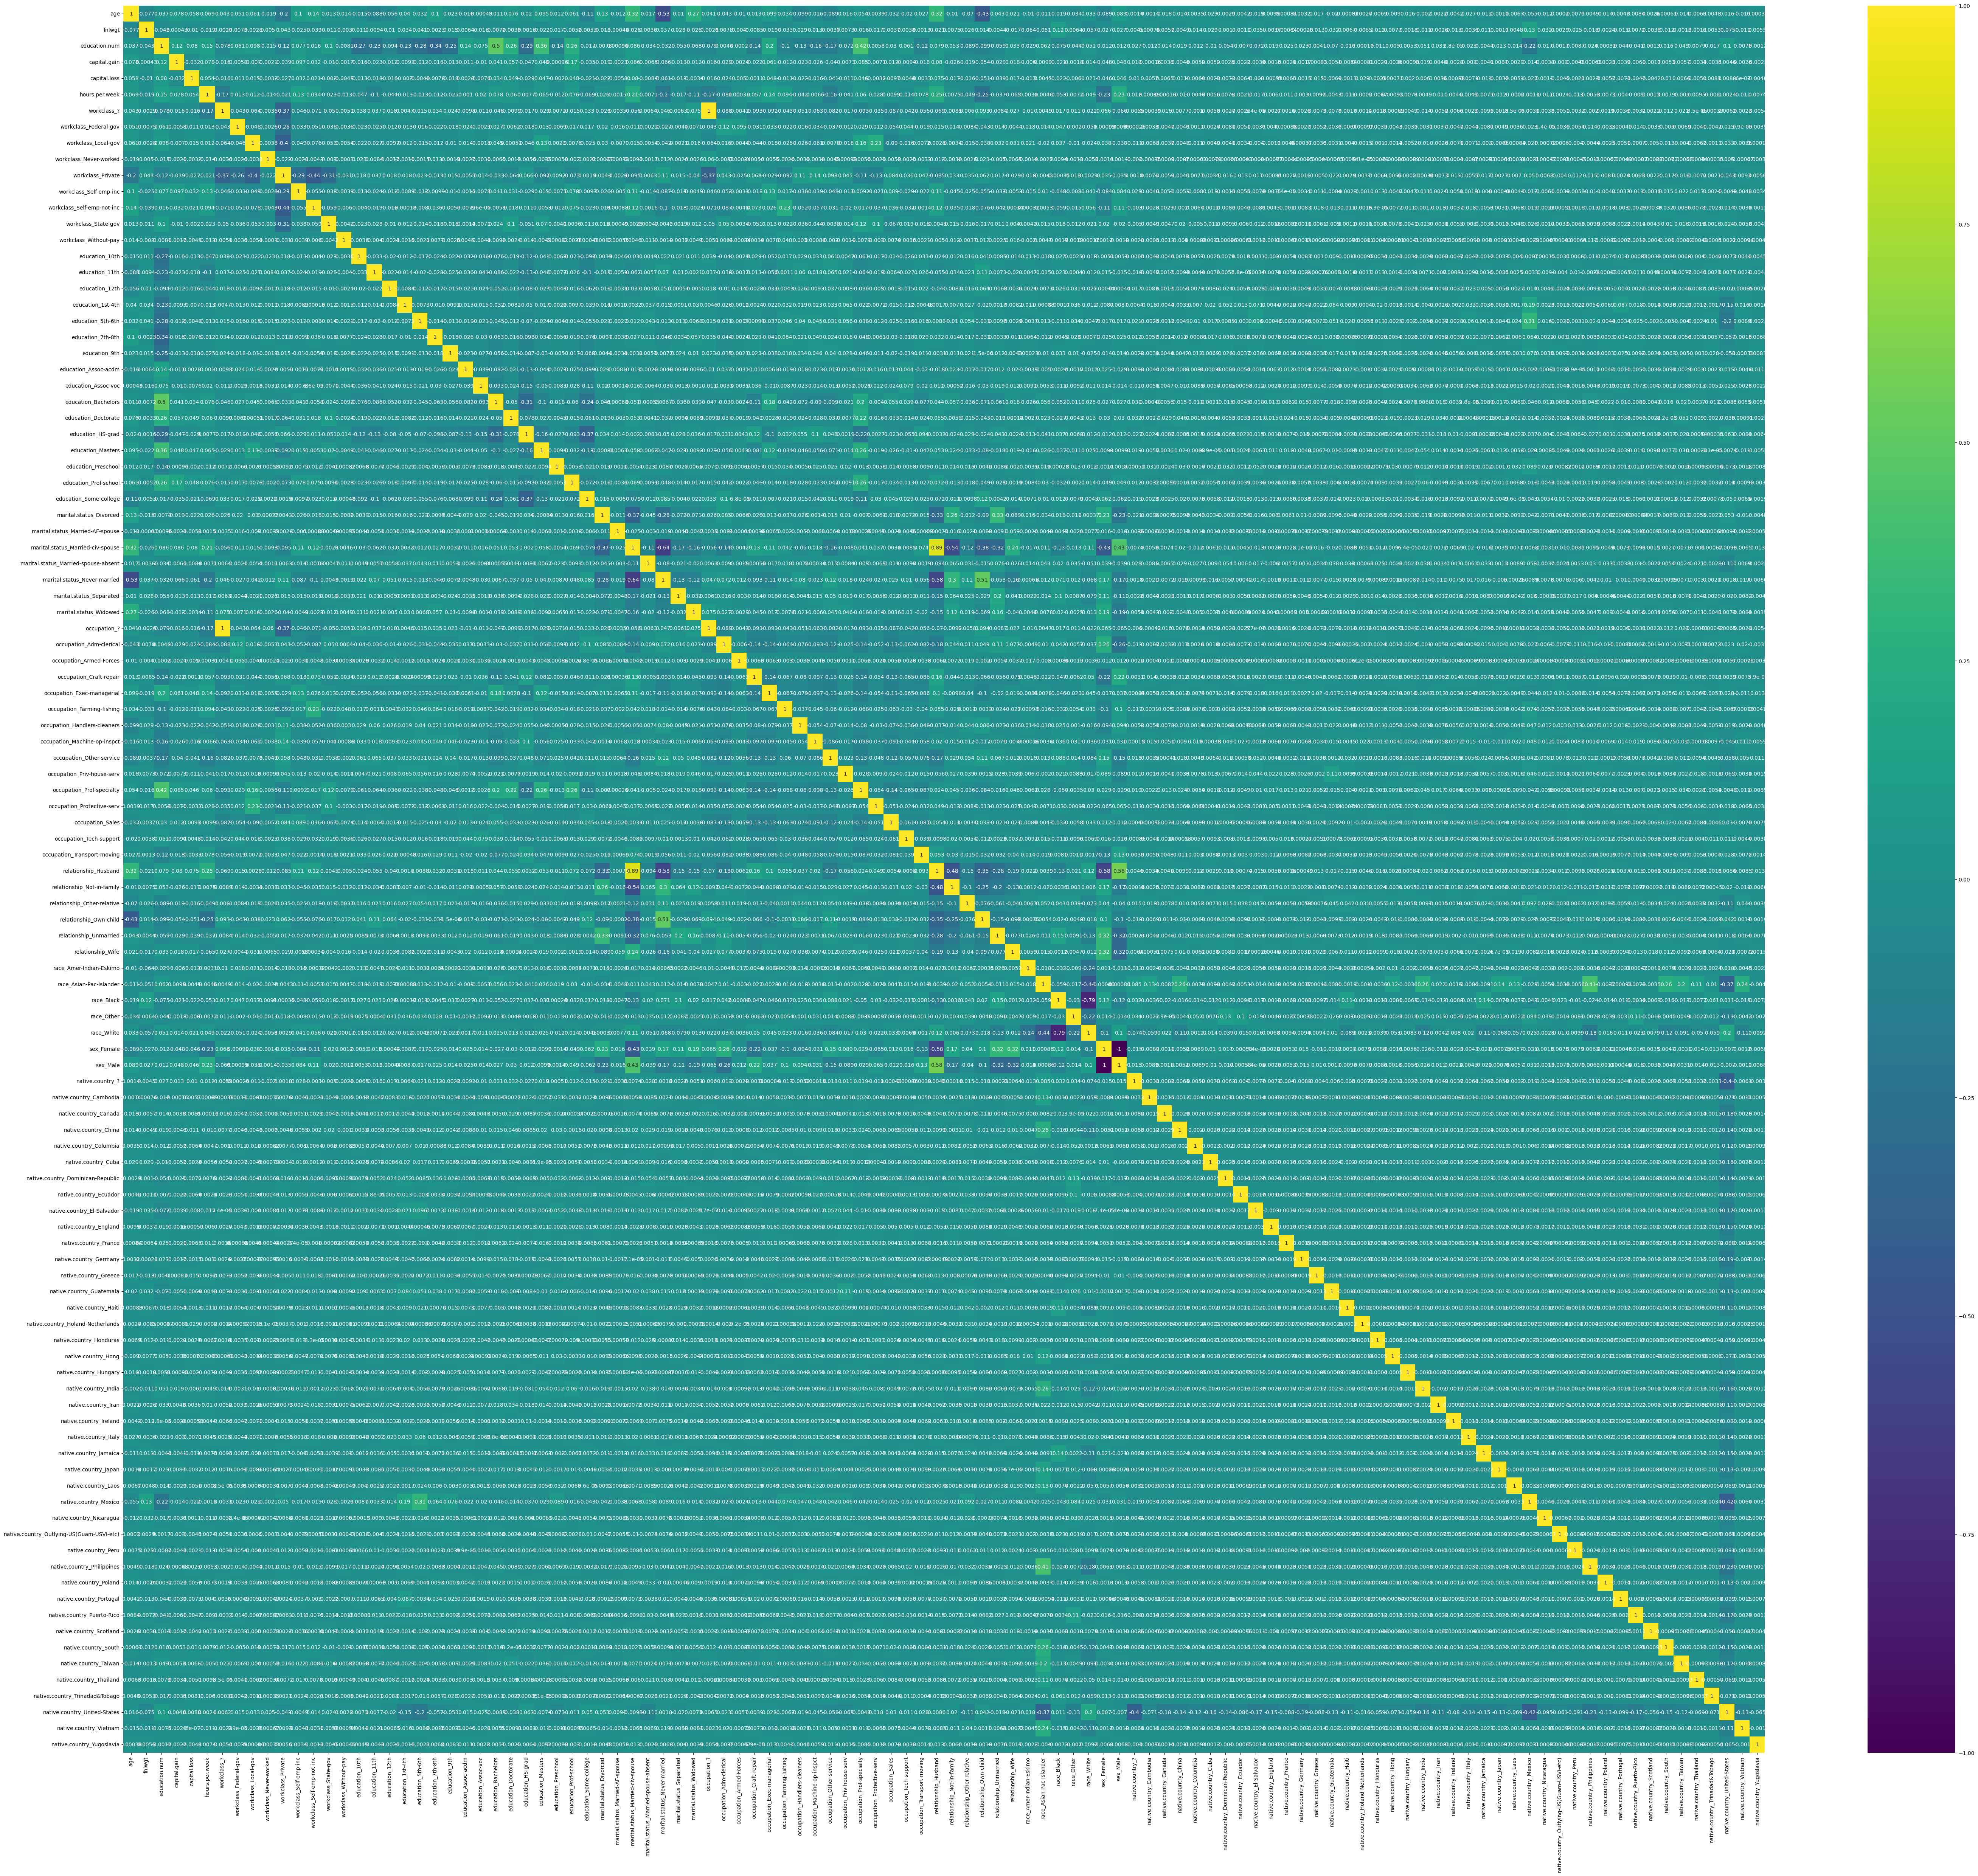

In [13]:
plt.figure(figsize=(70,60))
sns.heatmap(processed_df.corr(),annot=True,cmap="viridis")

ahh! so its impossible to intrept this... nvm

<Axes: >

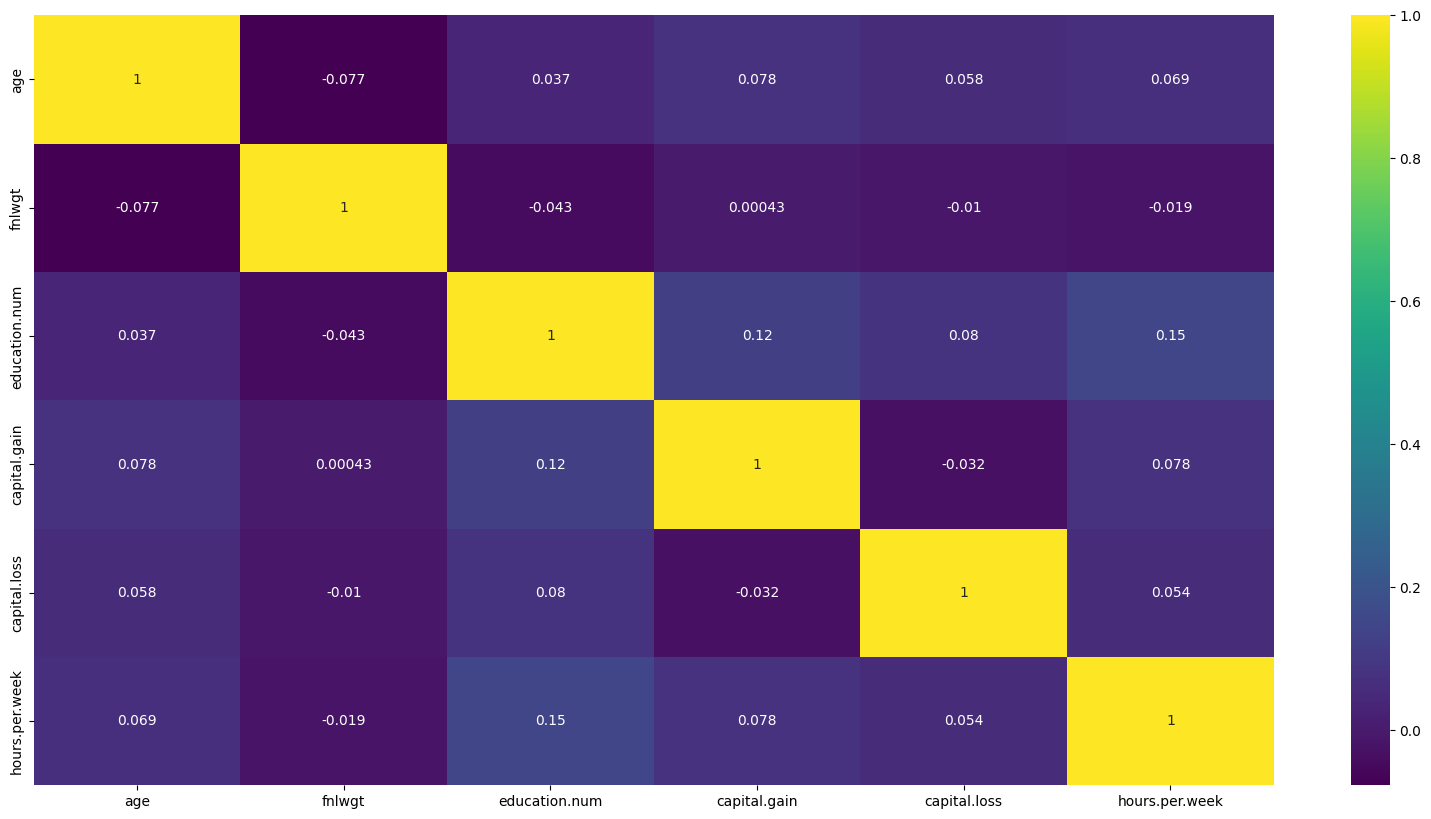

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(input_df[numeric_cols].corr(),annot=True,cmap="viridis")

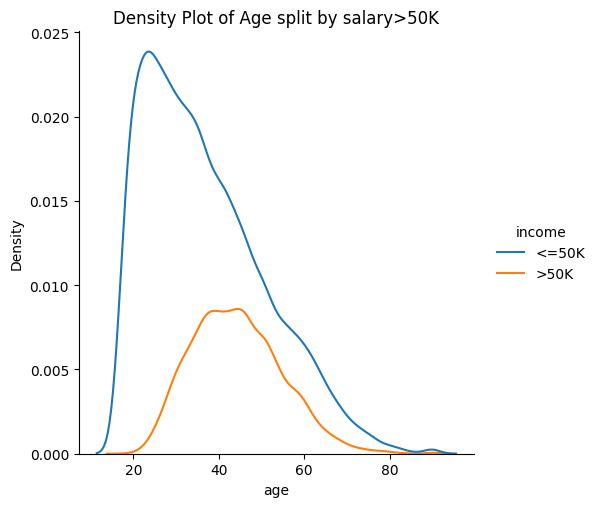

In [15]:
sns.displot(income_df, x="age", hue="income", kind="kde").set(title='Density Plot of Age split by salary>50K')

We see that the distribution of age is different for the population which has a salary above 50K vs the population which has a salary below 50K. This is however expected has age should have an influence on salary. But we want to limit the impact of age on salary only to the extent it is explained in the data so far so we dont skew the blue curve even more to the left or the orange curve even more to the right

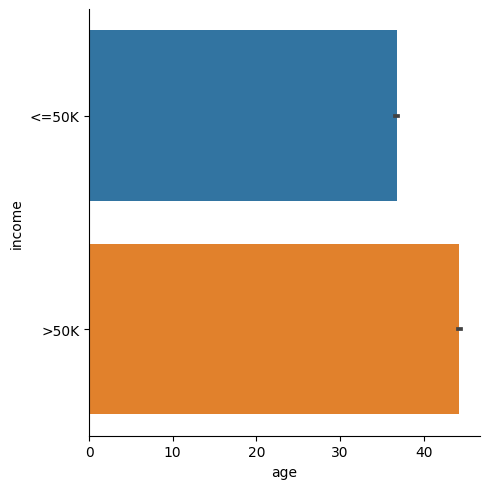

In [16]:
sns.catplot(data=income_df, x="age", y="income", kind="bar")

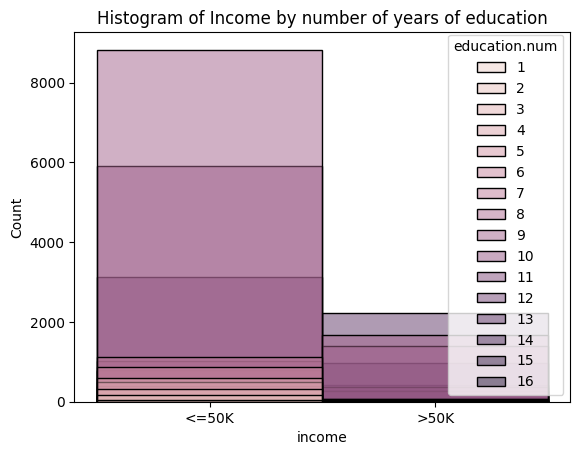

In [17]:
sns.histplot(data=income_df, x='income', hue='education.num')

plt.xlabel('income')
plt.ylabel('Count')
plt.title('Histogram of Income by number of years of education')
plt.show()
     

In [18]:
income_df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

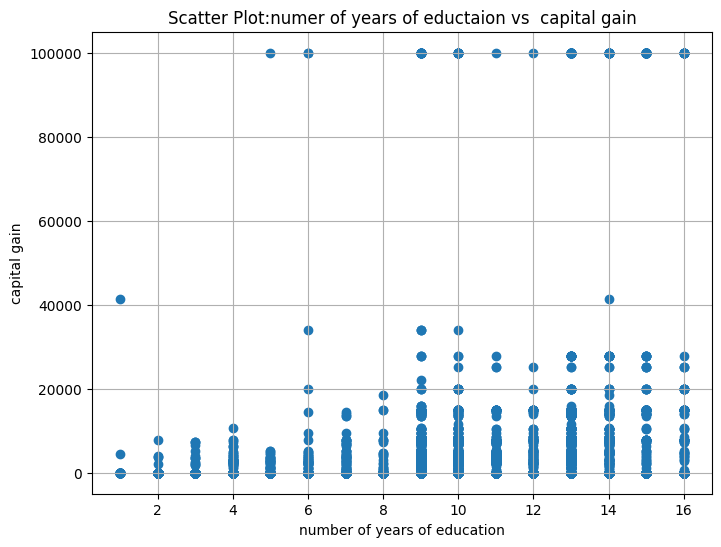

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(income_df['education.num'], income_df['capital.gain'])
plt.xlabel('number of years of education')
plt.ylabel('capital gain')
plt.title('Scatter Plot:numer of years of eductaion vs  capital gain')
plt.grid(True)
plt.show()

its kinda suggesting a positive relationship...However, it's important to remember that correlation does not imply causation. Just because two variables are correlated does not mean that one causes the other to occur.

# splitting the data into train, validation and test set
We do so to train the model on one set, validate the model and tune some hyperparameters... and making the model more better... and finally testing the model on test set

its to prevent overfitting
here we will only do a 80-20 split for training and testing... but we can also do 60-20-20 split

In [20]:
from sklearn.model_selection import train_test_split
train_inputs,test_inputs,train_targets,test_targets=train_test_split(processed_df,target_df,test_size=0.25,random_state=42)

In [21]:
train_targets


29        >50K
12181    <=50K
18114    <=50K
4278      >50K
12050    <=50K
         ...  
29802    <=50K
5390      >50K
860       >50K
15795     >50K
23654    <=50K
Name: income, Length: 24420, dtype: object

# training different models 

In [22]:
# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

**Logistic regressorr**

In [23]:
model1=LogisticRegression(solver='saga',random_state=42)
model1.fit(train_inputs,train_targets)
test_pred=model1.predict(test_inputs)

In [24]:
accuracy_score(test_pred,test_targets)

0.8470703844736519

In [25]:
model2=RandomForestClassifier(n_estimators=400,random_state=42)
model2.fit(train_inputs,train_targets)
test_pred2=model2.predict(test_inputs)

In [26]:
accuracy_score(test_pred2,test_targets)

0.8512467755803955

In [27]:
model3=SVC(random_state=42)
model3.fit(train_inputs,train_targets)
test_pred3=model3.predict(test_inputs)


In [28]:
accuracy_score(test_pred3,test_targets)

0.8341727060557671

In [29]:
confusion=confusion_matrix(test_targets,test_pred2,normalize='true')#true negative false positive false negative true positive

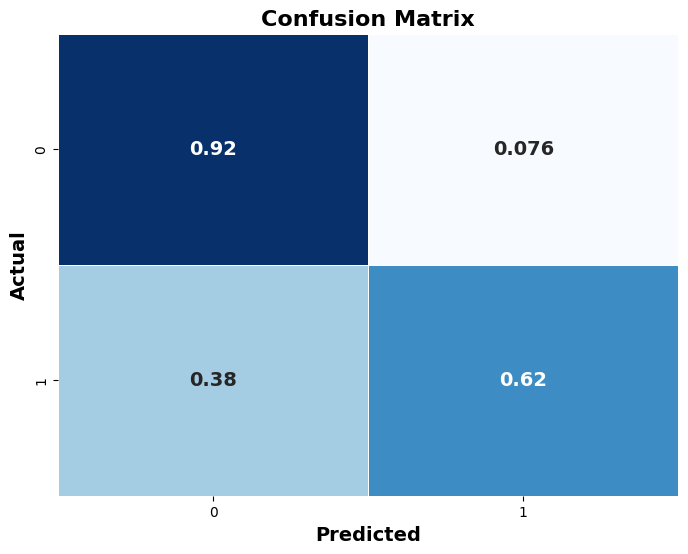

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

# lets tune the hyperparameters of our best model... the random forest model 

In [31]:
from sklearn.model_selection import GridSearchCV


In [32]:
params = {
    "n_estimators" : np.arange(100, 200, 500),
    "max_depth" : np.arange(5, 20, 5),
    "min_samples_split" : np.arange(2, 7, 2),
    "min_samples_leaf" : np.arange(1, 7, 2)
    }

RandomSearch = GridSearchCV(estimator=model2, param_grid=params, scoring="accuracy", n_jobs=-1, cv=5, verbose=1)
RandomSearch.fit(train_inputs,train_targets)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=400,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([ 5, 10, 15]),
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([100])},
             scoring='accuracy', verbose=1)

In [33]:
RandomSearch.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [34]:
model21=RandomForestClassifier(n_estimators=5000,max_depth=15,min_samples_leaf=1,min_samples_split=4,random_state=42)
model21.fit(train_inputs,train_targets)
test_pred21=model21.predict(test_inputs)

In [35]:
accuracy_score(test_pred21,test_targets)

0.8560373418498956